# Zadaci računarske vizije:

1. **Klasifikacija slike**    
Određivanje kojoj klasi pripada cela slika.     
Primer: fotografija se svrstava u kategoriju „pas“ ili „mačka“.

2. **Detekcija objekata**    
Pronalaženje i označavanje objekata na slici pomoću pravougaonih okvira.     
Primer: prepoznavanje automobila, pešaka ili semafora na ulici.

3. **Semantička segmentacija**     
Dodeljivanje klase svakom pikselu slike, tako da se zna koji deo slike pripada kojoj kategoriji.     
Primer: Svi pikseli vegetacije dobijaju oznaku „drveće“ itd.

![img/tasks.png](img/tasks.png)

## Detekcija objekata


Detekcija objekata (Object Detection) je zadatak u računarskoj viziji gde želimo da:
- Pronađemo sve instance objekata u slici.
- Odredimo njihove pozicije (obično pravougaoni okvir – bounding box).
- Klasifikujemo te objekte u odgovarajuće kategorije (npr. „pas“, „auto“, „osoba“).

Dakle, detekcija objekata kombinuje klasifikaciju i lokalizaciju.

## Pristupi detekciji objekata

1. Tradicionalni pristupi (pre deep learning-a)
- Obučavanje klasifikatora
- Pokretni prozor + Izdvajanje osobina (HOG) + Klasifikator (SVM)

![img/sliding_window.gif](img/sliding_window.gif)

- Spajanje regiona od interesa

![img/merge.png](img/merge.png)


2. Deep Learning pristupi      
- a) Two-stage detectors (dvoslojni detektori):      
Prvo se predlažu regioni (Region Proposals), zatim se klasifikuju.      
Primer: R-CNN, Fast R-CNN, Faster R-CNN.    
- b) One-stage detectors (jednoslojni detektori):      
Direktno predviđaju okvire i klase bez posebnog predloga regiona.      
Primer: YOLO (You Only Look Once), SSD (Single Shot Detector).    

## YOLO (You only look once)

Ideja YOLO-a je da sve uradi u jednom prolazu kroz CNN, zbog čega se i zove “You Only Look Once”.
To znači da jedan CNN, u jednom prolazu, mora da pronađe više različitih instanci objekata, ispravno ih klasifikuje i nacrta okvir (bounding box) oko njih.

![img/yolo_arch.png](img/yolo_arch.png)

Da bi to postigli, autori YOLO-a su podelili zadatak detekcije objekata na dva podzadatka i napravili model koji istovremeno rešava oba:

1. Regionalizovana klasifikacija
2. Predikcija okvira (Bounding Box Prediction)

![img/yolo_pred.png](img/yolo_pred.png)



Instaliranje i import:

In [9]:
!pip install -U ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.203 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 39.3/112.6 GB disk)


Učitavanje modela:

In [ ]:
model = YOLO("yolo11n.yaml")

Učitavanje pretreniranog modela za detekciju:

In [39]:
model = YOLO('yolo11n.pt')

Fine tunning:

In [40]:
model.train(data='coco8.yaml',  task = 'detect', epochs=3)

Ultralytics 8.3.203 🚀 Python-3.12.11 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=coco8.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=3, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0, 16, 17, 20, 25, 58])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c3531740680>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,

Prikaz rezultata:


Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 /content/bus.jpg: 640x480 4 persons, 1 bus, 164.0ms
Speed: 3.3ms preprocess, 164.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


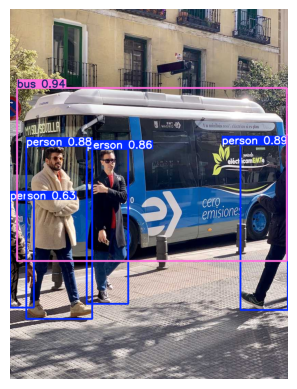

In [41]:
import matplotlib.pyplot as plt
import cv2

res = model('https://ultralytics.com/images/bus.jpg')

img_bgr = res[0].plot()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.axis('off')
plt.show()


# Semantička segmentacija

Segmentacija slike je proces deljenja slike na regije ili objekte koji imaju slične karakteristike.
Cilj je da se svaki piksel označi tako da pikseli iste klase pripadaju istom objektu ili području.
Koristi se, na primer, u medicinskoj dijagnostici, autonomnoj vožnji i video-nadzoru za precizno izdvajanje i analiziranje delova slike.

## KMeans

Nenadgledani algoritam za klasterovanje koji deli podatke u k klastera tako da su podaci u svakom klasteru međusobno što sličniji, a klasteri međusobno što različitiji.

Radi iterativno:
1. Nasumično postavlja k centara klastera (centroida).
2. Svaki podatak (u našem slučaju piksel) pridružuje klasteru sa najbližim centrom.
3. Izračunava nove centre klastera kao srednju vrednost članova klastera.
4. Ponavlja dok se centri ne stabilizuju.

![img/kmeans.gif](img/kmeans.gif)

Importi:

In [42]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

Učitavanje slike:

In [48]:
img = cv2.imread("img/bug.png")
img_convert = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

print("Dimenzije slike:", img.shape)

Dimenzije slike: (307, 303, 3)


Vektorisanje slike:

In [49]:
vectorized = img_convert.reshape((-1,3))
vectorized = np.float32(vectorized)

vectorized.shape

(93021, 3)

Pokretanje algoritma za različite vrednosti K:

In [50]:
# (EPS = 1.0, max_iter = 10)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

# --- Prvi rezultat: K=10
K = 10
attempts = 10
ret, label, center = cv2.kmeans(vectorized, K, None, criteria, attempts, cv2.KMEANS_PP_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
result_image1 = res.reshape((img_convert.shape))

# --- Drugi rezultat: K=4
K = 4
ret, label, center = cv2.kmeans(vectorized, K, None, criteria, attempts, cv2.KMEANS_PP_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
result_image2 = res.reshape((img_convert.shape))

# --- Treći rezultat: K=2
K = 2
ret, label, center = cv2.kmeans(vectorized, K, None, criteria, attempts, cv2.KMEANS_PP_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
result_image3 = res.reshape((img_convert.shape))


Prikaz rezultata:

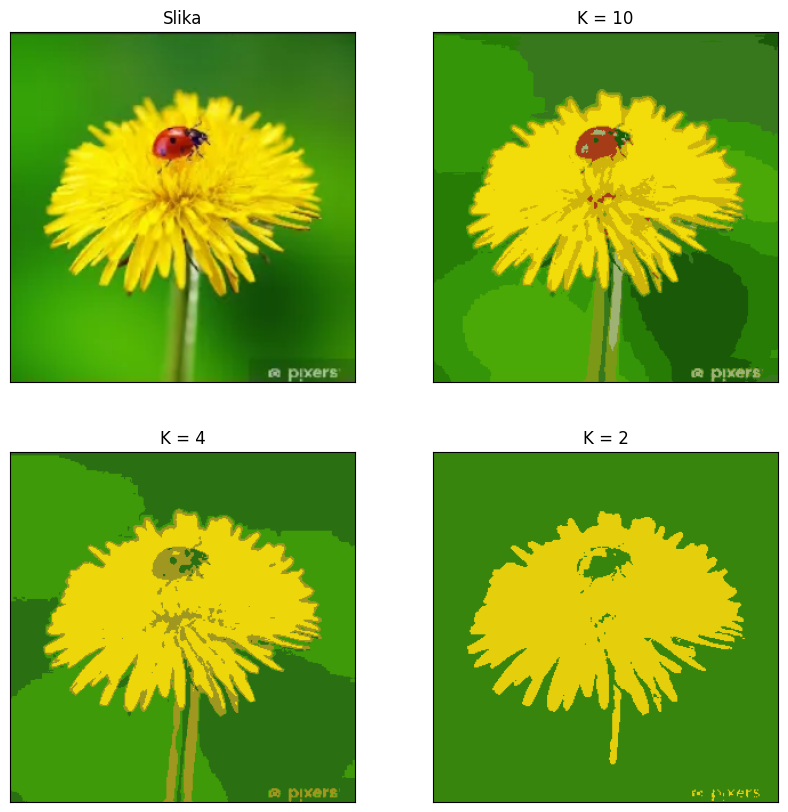

In [51]:
figure_size = 10
plt.figure(figsize=(figure_size, figure_size))

# Original
plt.subplot(2,2,1)
plt.imshow(img_convert)
plt.title('Slika')
plt.xticks([]), plt.yticks([])

# Segmentisane slike
plt.subplot(2,2,2)
plt.imshow(result_image1)
plt.title('K = 10')
plt.xticks([]), plt.yticks([])

plt.subplot(2,2,3)
plt.imshow(result_image2)
plt.title('K = 4')
plt.xticks([]), plt.yticks([])

plt.subplot(2,2,4)
plt.imshow(result_image3)
plt.title('K = 2')
plt.xticks([]), plt.yticks([])

plt.show()

## U-Net

![img/unet_architecture.png](img/unet_architecture.png)

U-net je konvolutivna neuronska mreža posebno dizajnirana za semantičku segmentaciju.

Prvobitno je napravljena za medicinske slike (segmentacija ćelija na mikroskopskim snimcima), ali danas se koristi svuda gde treba precizno označiti piksele: satelitski snimci, autonomna vožnja, agronomija, industrijska inspekcija…

![img/unet_tasks.png](img/unet_tasks.png)

Ime “U-Net” dolazi od oblika njene arhitekture koja podseća na slovo U.

![img/u_architecture.png](img/u_architecture.png)

### Osnovna ideja

Sastoji se od dva simetrična dela:
- Encoder (put sužavanja / contracting path)
- Decoder (put proširivanja / expanding path)

![img/encoder_decoder.png](img/encoder_decoder.png)

Ključna karakteristika su skip-konekcije – direktno prenose feature map-e iz encoder dela u odgovarajući nivo decoder dela.

![img/unet_example.png](img/unet_example.png)

Cilj:
- Encoder: uhvati kontekst i ekstrakciju karakteristika.
- Decoder: precizno rekonstruiše prostornu informaciju i generiše segmentacionu mapu.

![img/unet_training.png](img/unet_training.png)

Kreiranje U-Net modela:

In [1]:
import torch
import torch.nn as nn
from torchvision import models
from torch.nn.functional import relu
import matplotlib.pyplot as plt
import numpy as np
import random
from functools import reduce
import itertools
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, datasets, models
from collections import defaultdict
import torch.nn.functional as F
import torch
import torch.optim as optim
from torch.optim import lr_scheduler
import time
import copy

class UNet(nn.Module):
  def __init__(self, n_class):
        super().__init__()

        # input: 572x572x3
        self.e11 = nn.Conv2d(3, 64, kernel_size=3, padding=1) # output: 570x570x64
        self.e12 = nn.Conv2d(64, 64, kernel_size=3, padding=1) # output: 568x568x64
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2) # output: 284x284x64

        # input: 284x284x64
        self.e21 = nn.Conv2d(64, 128, kernel_size=3, padding=1) # output: 282x282x128
        self.e22 = nn.Conv2d(128, 128, kernel_size=3, padding=1) # output: 280x280x128
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2) # output: 140x140x128

        # input: 140x140x128
        self.e31 = nn.Conv2d(128, 256, kernel_size=3, padding=1) # output: 138x138x256
        self.e32 = nn.Conv2d(256, 256, kernel_size=3, padding=1) # output: 136x136x256
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2) # output: 68x68x256

        # input: 68x68x256
        self.e41 = nn.Conv2d(256, 512, kernel_size=3, padding=1) # output: 66x66x512
        self.e42 = nn.Conv2d(512, 512, kernel_size=3, padding=1) # output: 64x64x512
        self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2) # output: 32x32x512

        # input: 32x32x512
        self.e51 = nn.Conv2d(512, 1024, kernel_size=3, padding=1) # output: 30x30x1024
        self.e52 = nn.Conv2d(1024, 1024, kernel_size=3, padding=1) # output: 28x28x1024


        # Decoder
        self.upconv1 = nn.ConvTranspose2d(1024, 512, kernel_size=2, stride=2)
        self.d11 = nn.Conv2d(1024, 512, kernel_size=3, padding=1)
        self.d12 = nn.Conv2d(512, 512, kernel_size=3, padding=1)

        self.upconv2 = nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2)
        self.d21 = nn.Conv2d(512, 256, kernel_size=3, padding=1)
        self.d22 = nn.Conv2d(256, 256, kernel_size=3, padding=1)

        self.upconv3 = nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2)
        self.d31 = nn.Conv2d(256, 128, kernel_size=3, padding=1)
        self.d32 = nn.Conv2d(128, 128, kernel_size=3, padding=1)

        self.upconv4 = nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2)
        self.d41 = nn.Conv2d(128, 64, kernel_size=3, padding=1)
        self.d42 = nn.Conv2d(64, 64, kernel_size=3, padding=1)

        # Output layer
        self.outconv = nn.Conv2d(64, n_class, kernel_size=1)


  def forward(self, x):
        # Encoder
        xe11 = relu(self.e11(x))
        xe12 = relu(self.e12(xe11))
        xp1 = self.pool1(xe12)

        xe21 = relu(self.e21(xp1))
        xe22 = relu(self.e22(xe21))
        xp2 = self.pool2(xe22)

        xe31 = relu(self.e31(xp2))
        xe32 = relu(self.e32(xe31))
        xp3 = self.pool3(xe32)

        xe41 = relu(self.e41(xp3))
        xe42 = relu(self.e42(xe41))
        xp4 = self.pool4(xe42)

        xe51 = relu(self.e51(xp4))
        xe52 = relu(self.e52(xe51))

        # Decoder
        xu1 = self.upconv1(xe52)
        xu11 = torch.cat([xu1, xe42], dim=1)
        xd11 = relu(self.d11(xu11))
        xd12 = relu(self.d12(xd11))

        xu2 = self.upconv2(xd12)
        xu22 = torch.cat([xu2, xe32], dim=1)
        xd21 = relu(self.d21(xu22))
        xd22 = relu(self.d22(xd21))

        xu3 = self.upconv3(xd22)
        xu33 = torch.cat([xu3, xe22], dim=1)
        xd31 = relu(self.d31(xu33))
        xd32 = relu(self.d32(xd31))

        xu4 = self.upconv4(xd32)
        xu44 = torch.cat([xu4, xe12], dim=1)
        xd41 = relu(self.d41(xu44))
        xd42 = relu(self.d42(xd41))

        # Output layer
        out = self.outconv(xd42)

        return out

Definisanje loss funkcija:

In [2]:
def dice_loss(pred, target, smooth=1.):
    pred = pred.contiguous()
    target = target.contiguous()
    intersection = (pred * target).sum(dim=2).sum(dim=2)
    loss = (1 - ((2. * intersection + smooth) / (pred.sum(dim=2).sum(dim=2) + target.sum(dim=2).sum(dim=2) + smooth)))

    return loss.mean()


def calc_loss(pred, target, metrics, bce_weight=0.5):
    bce = F.binary_cross_entropy_with_logits(pred, target)
    pred = F.sigmoid(pred)
    dice = dice_loss(pred, target)

    loss = bce * bce_weight + dice * (1 - bce_weight)

    metrics['bce'] += bce.data.cpu().numpy() * target.size(0)
    metrics['dice'] += dice.data.cpu().numpy() * target.size(0)
    metrics['loss'] += loss.data.cpu().numpy() * target.size(0)

    return loss

def print_metrics(metrics, epoch_samples, phase):
    outputs = []
    for k in metrics.keys():
        outputs.append("{}: {:4f}".format(k, metrics[k] / epoch_samples))

    print("{}: {}".format(phase, ", ".join(outputs)))

Generisanje skupa podataka:

In [3]:
def generate_random_data(height, width, count):
    x, y = zip(*[generate_img_and_mask(height, width) for i in range(0, count)])
    X = np.asarray(x) * 255
    X = X.repeat(3, axis=1).transpose([0, 2, 3, 1]).astype(np.uint8)
    Y = np.asarray(y)

    return X, Y


def generate_img_and_mask(height, width):
    shape = (height, width)

    triangle_location = get_random_location(*shape)
    circle_location1 = get_random_location(*shape, zoom=0.7)
    circle_location2 = get_random_location(*shape, zoom=0.5)
    mesh_location = get_random_location(*shape)
    square_location = get_random_location(*shape, zoom=0.8)
    plus_location = get_random_location(*shape, zoom=1.2)

    # Kreiranje input slike
    arr = np.zeros(shape, dtype=bool)
    arr = add_triangle(arr, *triangle_location)
    arr = add_circle(arr, *circle_location1)
    arr = add_circle(arr, *circle_location2, fill=True)
    arr = add_mesh_square(arr, *mesh_location)
    arr = add_filled_square(arr, *square_location)
    arr = add_plus(arr, *plus_location)
    arr = np.reshape(arr, (1, height, width)).astype(np.float32)

    # Kreiranje ciljne maske
    masks = np.asarray([
        add_filled_square(np.zeros(shape, dtype=bool), *square_location),
        add_circle(np.zeros(shape, dtype=bool), *circle_location2, fill=True),
        add_triangle(np.zeros(shape, dtype=bool), *triangle_location),
        add_circle(np.zeros(shape, dtype=bool), *circle_location1),
         add_filled_square(np.zeros(shape, dtype=bool), *mesh_location),
        add_plus(np.zeros(shape, dtype=bool), *plus_location)
    ]).astype(np.float32)

    return arr, masks

def add_square(arr, x, y, size):
    s = int(size / 2)
    arr[x-s,y-s:y+s] = True
    arr[x+s,y-s:y+s] = True
    arr[x-s:x+s,y-s] = True
    arr[x-s:x+s,y+s] = True

    return arr

def add_filled_square(arr, x, y, size):
    s = int(size / 2)
    xx, yy = np.mgrid[:arr.shape[0], :arr.shape[1]]
    return np.logical_or(arr, logical_and([xx > x - s, xx < x + s, yy > y - s, yy < y + s]))

def logical_and(arrays):
    new_array = np.ones(arrays[0].shape, dtype=bool)
    for a in arrays:
        new_array = np.logical_and(new_array, a)

    return new_array

def add_mesh_square(arr, x, y, size):
    s = int(size / 2)
    xx, yy = np.mgrid[:arr.shape[0], :arr.shape[1]]
    return np.logical_or(arr, logical_and([xx > x - s, xx < x + s, xx % 2 == 1, yy > y - s, yy < y + s, yy % 2 == 1]))


def add_triangle(arr, x, y, size):
    s = int(size / 2)
    triangle = np.tril(np.ones((size, size), dtype=bool))
    arr[x-s:x-s+triangle.shape[0],y-s:y-s+triangle.shape[1]] = triangle

    return arr


def add_circle(arr, x, y, size, fill=False):
    xx, yy = np.mgrid[:arr.shape[0], :arr.shape[1]]
    circle = np.sqrt((xx - x) ** 2 + (yy - y) ** 2)
    new_arr = np.logical_or(arr, np.logical_and(circle < size, circle >= size * 0.7 if not fill else True))

    return new_arr

def add_plus(arr, x, y, size):
    s = int(size / 2)
    arr[x-1:x+1,y-s:y+s] = True
    arr[x-s:x+s,y-1:y+1] = True

    return arr

def get_random_location(width, height, zoom=1.0):
    x = int(width * random.uniform(0.1, 0.9))
    y = int(height * random.uniform(0.1, 0.9))
    size = int(min(width, height) * random.uniform(0.06, 0.12) * zoom)

    return (x, y, size)

def plot_img_array(img_array, ncol=3):
    nrow = len(img_array) // ncol
    f, plots = plt.subplots(nrow, ncol, sharex='all', sharey='all', figsize=(ncol * 4, nrow * 4))
    for i in range(len(img_array)):
        plots[i // ncol, i % ncol]
        plots[i // ncol, i % ncol].imshow(img_array[i])

def plot_side_by_side(img_arrays):
    flatten_list = reduce(lambda x,y: x+y, zip(*img_arrays))
    plot_img_array(np.array(flatten_list), ncol=len(img_arrays))

def plot_errors(results_dict, title):
    markers = itertools.cycle(('+', 'x', 'o'))
    plt.title('{}'.format(title))
    for label, result in sorted(results_dict.items()):
        plt.plot(result, marker=next(markers), label=label)
        plt.ylabel('dice_coef')
        plt.xlabel('epoch')
        plt.legend(loc=3, bbox_to_anchor=(1, 0))

    plt.show()

def masks_to_colorimg(masks):
    colors = np.asarray([(201, 58, 64), (242, 207, 1), (0, 152, 75), (101, 172, 228),(56, 34, 132), (160, 194, 56)])
    colorimg = np.ones((masks.shape[1], masks.shape[2], 3), dtype=np.float32) * 255
    channels, height, width = masks.shape
    for y in range(height):
        for x in range(width):
            selected_colors = colors[masks[:,y,x] > 0.5]
            if len(selected_colors) > 0:
                colorimg[y,x,:] = np.mean(selected_colors, axis=0)

    return colorimg.astype(np.uint8)


def generate_images_and_masks_then_plot():
    # Generisanje podataka
    input_images, target_masks = generate_random_data(192, 192, count=3)
    for x in [input_images, target_masks]:
        print(x.shape)
        print(x.min(), x.max())

    # Promeni redosled kanala i napravi 3 kanala za prikaz u matplotlib-u
    input_images_rgb = [x.astype(np.uint8) for x in input_images]

    # Mapiraj svaki kanal (tj. svaku klasu) u odgovarajuću boju
    target_masks_rgb = [masks_to_colorimg(x) for x in target_masks]

    # Levo: ulazna slika (crno-bela), desno: ciljna maska (6 kanala)
    plot_side_by_side([input_images_rgb, target_masks_rgb])



In [4]:
class SimDataset(Dataset):
    def __init__(self, count, transform=None):
        self.input_images, self.target_masks = generate_random_data(192, 192, count=count)
        self.transform = transform

    def __len__(self):
        return len(self.input_images)

    def __getitem__(self, idx):
        image = self.input_images[idx]
        mask = self.target_masks[idx]
        if self.transform:
            image = self.transform(image)

        return [image, mask]


def get_data_loaders():
    # iste transformacije za train/val
    trans = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

    train_set = SimDataset(100, transform = trans)
    val_set = SimDataset(20, transform = trans)

    image_datasets = {
        'train': train_set, 'val': val_set
    }
    batch_size = 25
    dataloaders = {
        'train': DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=0),
        'val': DataLoader(val_set, batch_size=batch_size, shuffle=True, num_workers=0)
    }

    return dataloaders

Obučavanje modela:

In [5]:
def train_model(model, optimizer, scheduler, num_epochs=25):
    dataloaders = get_data_loaders()
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    best_model_wts = copy.deepcopy(model.state_dict())
    best_loss = 1e10

    for epoch in range(num_epochs):
        print('Epoha {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        since = time.time()

        # Svaka epoha ima train i val fazu:
        for phase in ['train', 'val']:
            if phase == 'train':
                scheduler.step()
                for param_group in optimizer.param_groups:
                    print("LR", param_group['lr'])

                model.train()  # Postavljanje modela za train fazu
            else:
                model.eval()  # Postavljanje modela za val fazu

            metrics = defaultdict(float)
            epoch_samples = 0

            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                # forward
                # pratimo istoriju samo za train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    loss = calc_loss(outputs, labels, metrics)

                    # backward + optimizacija samo za train
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                epoch_samples += inputs.size(0)

            print_metrics(metrics, epoch_samples, phase)
            epoch_loss = metrics['loss'] / epoch_samples

            # kopija modela
            if phase == 'val' and epoch_loss < best_loss:
                print("Čuvanje najboljeg modela")
                best_loss = epoch_loss
                best_model_wts = copy.deepcopy(model.state_dict())

        time_elapsed = time.time() - since
        print('{:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))

    print('Najbolji val loss: {:4f}'.format(best_loss))

    # učitaj najbolji model
    model.load_state_dict(best_model_wts)
    return model



In [6]:
def run_training():
    num_class = 6
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    model = UNet(num_class).to(device)
    optimizer_ft = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=1e-4)
    exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=30, gamma=0.1)
    model = train_model(model, optimizer_ft, exp_lr_scheduler, num_epochs=60)
    return model

model = run_training()


Epoha 0/59
----------
LR 0.0001


/usr/local/lib/python3.12/dist-packages/torch/optim/lr_scheduler.py:192: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn(


train: bce: 0.674731, dice: 0.990514, loss: 0.832622
val: bce: 0.663201, dice: 0.989973, loss: 0.826587
Čuvanje najboljeg modela
0m 4s
Epoha 1/59
----------
LR 0.0001
train: bce: 0.656325, dice: 0.990439, loss: 0.823382
val: bce: 0.643207, dice: 0.989922, loss: 0.816564
Čuvanje najboljeg modela
0m 3s
Epoha 2/59
----------
LR 0.0001
train: bce: 0.632642, dice: 0.990389, loss: 0.811515
val: bce: 0.612056, dice: 0.989863, loss: 0.800959
Čuvanje najboljeg modela
0m 3s
Epoha 3/59
----------
LR 0.0001
train: bce: 0.594123, dice: 0.990311, loss: 0.792217
val: bce: 0.557494, dice: 0.989729, loss: 0.773612
Čuvanje najboljeg modela
0m 3s
Epoha 4/59
----------
LR 0.0001
train: bce: 0.524145, dice: 0.990138, loss: 0.757142
val: bce: 0.454353, dice: 0.989477, loss: 0.721915
Čuvanje najboljeg modela
0m 3s
Epoha 5/59
----------
LR 0.0001
train: bce: 0.382648, dice: 0.989939, loss: 0.686293
val: bce: 0.217614, dice: 0.989943, loss: 0.603779
Čuvanje najboljeg modela
0m 3s
Epoha 6/59
----------
LR 0.000

Prikaz instance test skupa:

(3, 6, 192, 192)


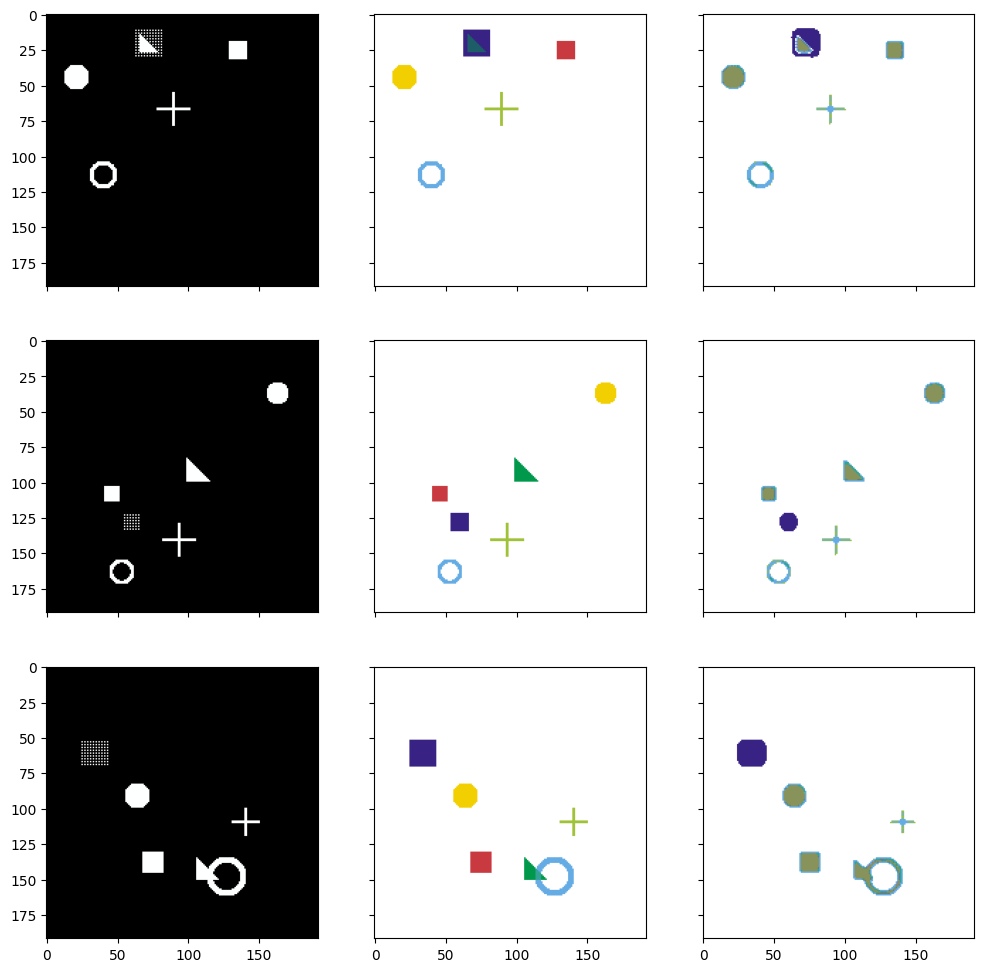

In [7]:
def reverse_transform(inp):
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    inp = (inp * 255).astype(np.uint8)

    return inp

def evaluate():
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    model.eval()

    trans = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # imagenet
    ])

    # Kreiranje generičkog test skupa
    test_dataset = SimDataset(3, transform = trans)
    test_loader = DataLoader(test_dataset, batch_size=3, shuffle=False, num_workers=0)

    # Uzimanje prvog batch-a
    inputs, labels = next(iter(test_loader))
    inputs = inputs.to(device)
    labels = labels.to(device)

    # Predikcija
    pred = model(inputs)
    pred = F.sigmoid(pred)
    pred = pred.data.cpu().numpy()
    print(pred.shape)

    # Vraćanje ulaznih slika u RGB format za prikaz
    input_images_rgb = [reverse_transform(x) for x in inputs.cpu()]

    # Pretvaranje ciljnih maski i predikcija u obojene slike po klasama
    target_masks_rgb = [masks_to_colorimg(x) for x in labels.cpu().numpy()]
    pred_rgb = [masks_to_colorimg(x) for x in pred]

    plot_side_by_side([input_images_rgb, target_masks_rgb, pred_rgb])

evaluate()

YOLO segmentacija

Učitavanje pretreniranog modela:

In [10]:
from ultralytics import YOLO

model = YOLO('yolo11n-seg.pt')

Obučavanje:

In [11]:
model.train(data='coco8-seg.yaml', epochs=3)

Ultralytics 8.3.203 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=coco8-seg.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=3, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretra

ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([ 0, 16, 17, 20, 25, 58])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e353ef1a960>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0

Prikaz rezultata:


image 1/1 /content/bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 71.5ms
Speed: 2.8ms preprocess, 71.5ms inference, 13.8ms postprocess per image at shape (1, 3, 640, 480)


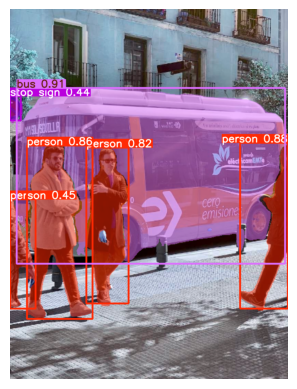

In [12]:
import matplotlib.pyplot as plt
results =model('https://ultralytics.com/images/bus.jpg')

plt.imshow(results[0].plot())# vraća sliku sa segmentacionim maskama i box-ovima
plt.axis('off')
plt.show()